In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from calendar import month_name, day_name

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Analysis-Workshop/master/Chapter02/data/Absenteeism_at_work.csv',
                sep=';')
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [3]:
df.shape

(740, 21)

In [4]:
df.isna().sum().sum()

0

In [5]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

In [6]:
df.head()

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               740 non-null    int64  
 1   reason_for_absence               740 non-null    int64  
 2   month_of_absence                 740 non-null    int64  
 3   day_of_the_week                  740 non-null    int64  
 4   seasons                          740 non-null    int64  
 5   transportation_expense           740 non-null    int64  
 6   distance_from_residence_to_work  740 non-null    int64  
 7   service_time                     740 non-null    int64  
 8   age                              740 non-null    int64  
 9   work_load_average/day            740 non-null    float64
 10  hit_target                       740 non-null    int64  
 11  disciplinary_failure             740 non-null    int64  
 12  education             

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
reason_for_absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
month_of_absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
day_of_the_week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
transportation_expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
distance_from_residence_to_work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
service_time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
work_load_average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


In [9]:
month_map = dict(zip(range(1,13), month_name[1:13]))
day_map = dict(zip(range(2,7), day_name[:5]))
season_map = dict(zip([1,2,3,4], ['Spring', 'Summer', 'Fall', 'Winter']))
education_map = dict(zip([1,2,3,4], ['High_School', 'Graduate', 'Postgraduate', 'Master_Phd']))
yes_no_map = {0:'No', 1:'Yes'}

In [10]:
preprocessed_df = df.copy()

In [11]:
preprocessed_df.month_of_absence = preprocessed_df.month_of_absence.map(month_map)
preprocessed_df.day_of_the_week = preprocessed_df.day_of_the_week.map(day_map)
preprocessed_df.seasons = preprocessed_df.seasons.map(season_map)
preprocessed_df.education = preprocessed_df.education.map(education_map)
preprocessed_df.disciplinary_failure = preprocessed_df.disciplinary_failure.map(yes_no_map)
preprocessed_df.social_drinker = preprocessed_df.social_drinker.map(yes_no_map)
preprocessed_df.social_smoker = preprocessed_df.social_smoker.map(yes_no_map)

In [12]:
preprocessed_df.head()

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
0,11,26,July,Tuesday,Spring,289,36,13,33,239.554,...,No,High_School,2,Yes,No,1,90,172,30,4
1,36,0,July,Tuesday,Spring,118,13,18,50,239.554,...,Yes,High_School,1,Yes,No,0,98,178,31,0
2,3,23,July,Wednesday,Spring,179,51,18,38,239.554,...,No,High_School,0,Yes,No,0,89,170,31,2
3,7,7,July,Thursday,Spring,279,5,14,39,239.554,...,No,High_School,2,Yes,Yes,0,68,168,24,4
4,11,23,July,Thursday,Spring,289,36,13,33,239.554,...,No,High_School,2,Yes,No,1,90,172,30,2


### Identifying Reasons for Absence

In [13]:
preprocessed_df['disease'] = preprocessed_df.reason_for_absence.apply(lambda x: 'Yes' if x>=1 and x<=21 else 'No')

In [14]:
preprocessed_df.head()

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours,disease
0,11,26,July,Tuesday,Spring,289,36,13,33,239.554,...,High_School,2,Yes,No,1,90,172,30,4,No
1,36,0,July,Tuesday,Spring,118,13,18,50,239.554,...,High_School,1,Yes,No,0,98,178,31,0,No
2,3,23,July,Wednesday,Spring,179,51,18,38,239.554,...,High_School,0,Yes,No,0,89,170,31,2,No
3,7,7,July,Thursday,Spring,279,5,14,39,239.554,...,High_School,2,Yes,Yes,0,68,168,24,4,Yes
4,11,23,July,Thursday,Spring,289,36,13,33,239.554,...,High_School,2,Yes,No,1,90,172,30,2,No


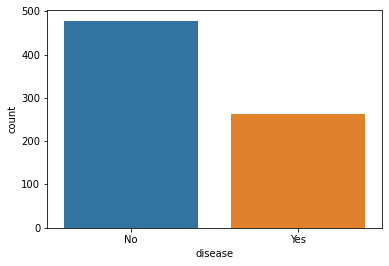

In [15]:
sns.countplot(x='disease', data=preprocessed_df, )
plt.show()

In [16]:
preprocessed_df.disease.value_counts(normalize=True)

No     0.645946
Yes    0.354054
Name: disease, dtype: float64

- The number of reasons for absence that are not listed in the ICD table is almost twice the number of listed ones.

1. What is the most common reason for absence?
2. Does being a drinker or smoker have some effect on the causes?
3. Does the distance to work have some effect on the reasons?

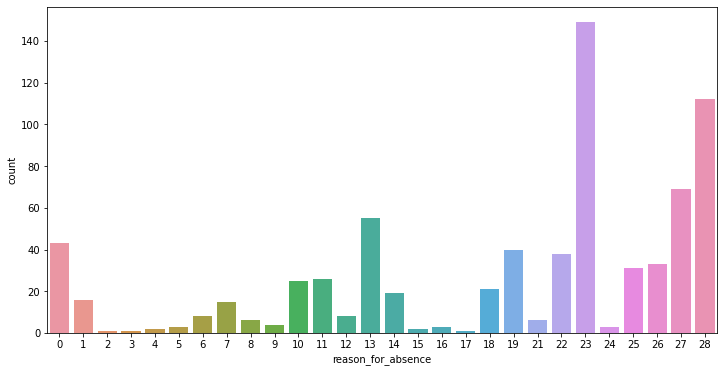

In [17]:
plt.figure(figsize=(12,6))

sns.countplot(x='reason_for_absence', data=preprocessed_df)

plt.show()

> we can assert that the most frequent reasons for absence are related to medical consultations (23), dental consultations (28), and physiotherapy (27). On the other hand, the most frequent reasons for absence encoded in the ICD encoding are related to diseases of the musculoskeletal system and connective tissue (13) and injury, poisoning, and certain other consequences of external causes (19).

In [18]:
preprocessed_df.head()

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours,disease
0,11,26,July,Tuesday,Spring,289,36,13,33,239.554,...,High_School,2,Yes,No,1,90,172,30,4,No
1,36,0,July,Tuesday,Spring,118,13,18,50,239.554,...,High_School,1,Yes,No,0,98,178,31,0,No
2,3,23,July,Wednesday,Spring,179,51,18,38,239.554,...,High_School,0,Yes,No,0,89,170,31,2,No
3,7,7,July,Thursday,Spring,279,5,14,39,239.554,...,High_School,2,Yes,Yes,0,68,168,24,4,Yes
4,11,23,July,Thursday,Spring,289,36,13,33,239.554,...,High_School,2,Yes,No,1,90,172,30,2,No


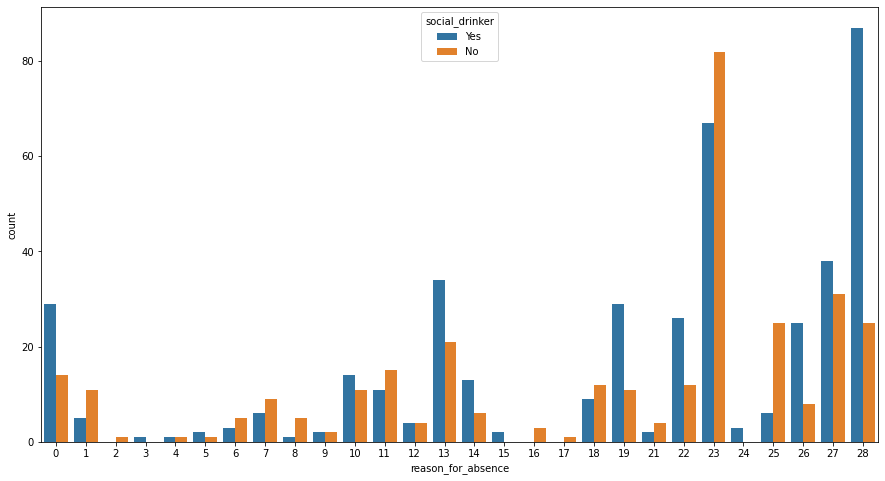

In [19]:
plt.figure(figsize=(15,8))

sns.countplot(x='reason_for_absence', data=preprocessed_df, hue='social_drinker')

plt.show()

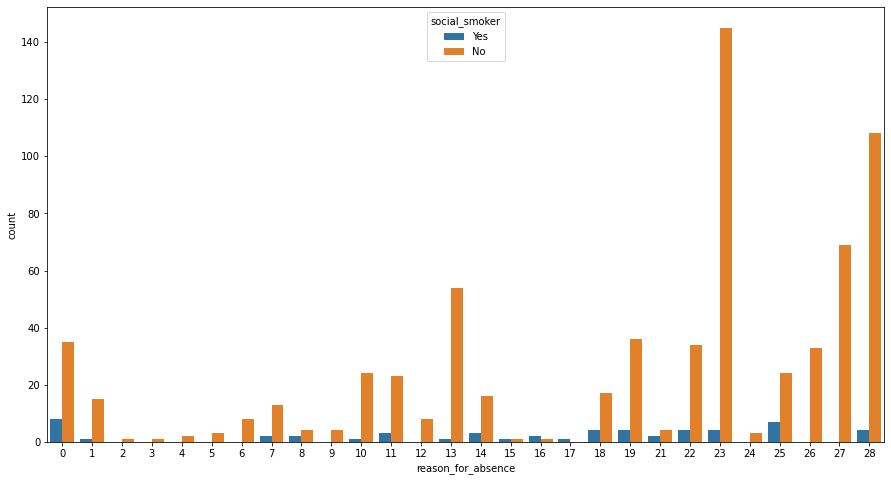

In [20]:
plt.figure(figsize=(15,8))

sns.countplot(x='reason_for_absence', data=preprocessed_df, hue='social_smoker', hue_order=['Yes', 'No'])

plt.show()

In [21]:
preprocessed_df.social_drinker.value_counts(normalize=True)

Yes    0.567568
No     0.432432
Name: social_drinker, dtype: float64

In [22]:
preprocessed_df.social_smoker.value_counts(normalize=True)

No     0.927027
Yes    0.072973
Name: social_smoker, dtype: float64

- 56% employees are social drinkers and only 7% are social smoker
> Furthermore, as the number of social smokers is quite small (only 7% of the entries), it is very hard to say whether there is actually a relationship between the absence reasons and smoking. A more rigorous approach in this direction would be to analyze the conditional probabilities of the different absence reasons, which are based on being a social drinker or smoker.

### Conditional Probability

In [23]:
probability = df[['social_drinker', 'social_smoker']].mean()
probability

social_drinker    0.567568
social_smoker     0.072973
dtype: float64

In [24]:
probability_of_social_drinker = probability[0]
probability_of_social_smoker = probability[1]

print(probability_of_social_drinker, probability_of_social_smoker)

0.5675675675675675 0.07297297297297298


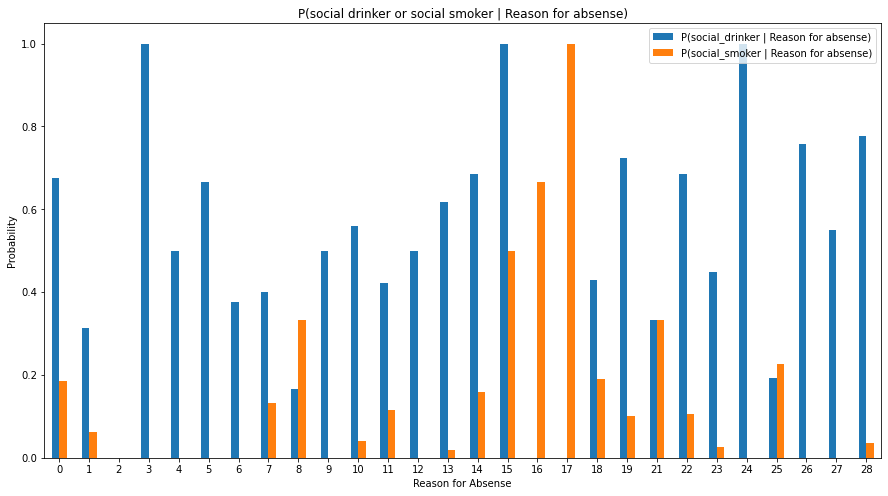

In [25]:
## probability--> P(Social Drinker | Absense for reason)

df1 = df.groupby('reason_for_absence')[['social_drinker', 'social_smoker']].agg('mean')

df1.plot.bar(figsize=(15, 8), rot=0)
plt.ylabel('Probability')
plt.xlabel("Reason for Absense")
plt.title('P(social drinker or social smoker | Reason for absense)')

plt.legend(labels=['P(social_drinker | Reason for absense)', 'P(social_smoker | Reason for absense)'])
plt.show()

In [26]:
reason_probability = df.groupby('reason_for_absence')['reason_for_absence'].count() / len(df)
reason_probability

reason_for_absence
0     0.058108
1     0.021622
2     0.001351
3     0.001351
4     0.002703
5     0.004054
6     0.010811
7     0.020270
8     0.008108
9     0.005405
10    0.033784
11    0.035135
12    0.010811
13    0.074324
14    0.025676
15    0.002703
16    0.004054
17    0.001351
18    0.028378
19    0.054054
21    0.008108
22    0.051351
23    0.201351
24    0.004054
25    0.041892
26    0.044595
27    0.093243
28    0.151351
Name: reason_for_absence, dtype: float64

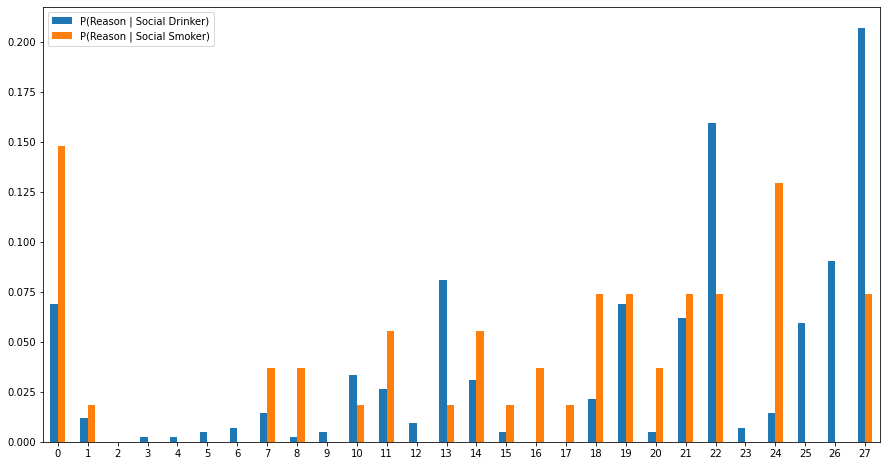

In [27]:
dataframe1 = df1.social_drinker * reason_probability / probability_of_social_drinker
dataframe2 = df1.social_smoker * reason_probability / probability_of_social_smoker


pd.DataFrame({'P(Reason | Social Drinker)':dataframe1.tolist(),
             'P(Reason | Social Smoker)':dataframe2.tolist()}).plot.bar(figsize=(15, 8), rot=0)

plt.show()

### Analyzing distribution of hours

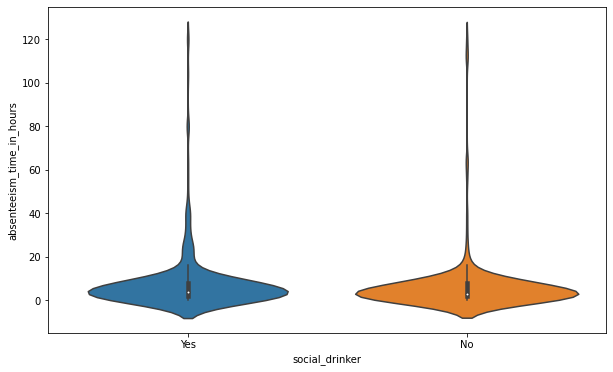

In [28]:
plt.figure(figsize=(10,6))
sns.violinplot(x='social_drinker', y='absenteeism_time_in_hours', data=preprocessed_df)
plt.show()

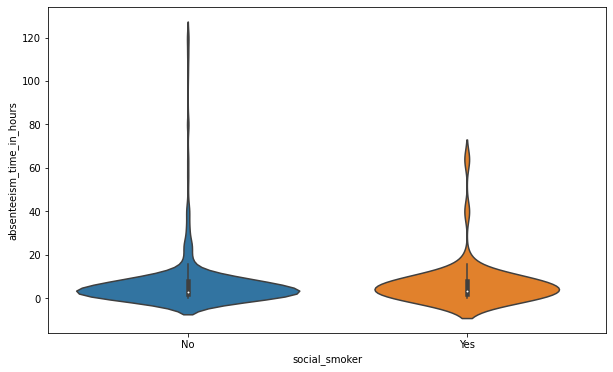

In [29]:
plt.figure(figsize=(10,6))
sns.violinplot(x='social_smoker', y='absenteeism_time_in_hours', data=preprocessed_df)
plt.show()

- Despite some differences in the outliers between smokers and non-smokers, there is no substantial difference in the distribution of absenteeism hours in drinkers and smokers.
- To assess this statement in a rigorous statistical way, perform hypothesis testing on the absenteeism hours (with a null hypothesis stating that the average absenteeism time in hours is the same for drinkers and non-drinkers)

In [30]:
hours_drinkers = preprocessed_df.absenteeism_time_in_hours[preprocessed_df.social_drinker=='Yes']
hours_non_drinkers = preprocessed_df.absenteeism_time_in_hours[preprocessed_df.social_drinker=='No']

In [31]:
result = stats.ttest_ind(hours_drinkers, hours_non_drinkers)

print("Test Statistic:", result[0])
print("p-value:", result[1])

Test Statistic: 1.7713833295243993
p-value: 0.07690961828294651


In [32]:
hours_smokers = preprocessed_df.absenteeism_time_in_hours[preprocessed_df.social_smoker=='Yes']
hours_non_smokers = preprocessed_df.absenteeism_time_in_hours[preprocessed_df.social_smoker=='No']

In [33]:
result = stats.ttest_ind(hours_smokers, hours_non_smokers)

print("Test Statistic:", result[0])
print("p-value:", result[1])

Test Statistic: -0.24277795417700243
p-value: 0.8082448720154971


- As we can see, the p-value of both tests is above the critical value of 0.05, which means that we cannot reject the null hypothesis. In other words, we cannot say that there is a statistically significant difference in the absenteeism hours between drinkers (and smokers) and non-drinkers (and non-smokers).

>  **Nevertheless, the average hours may still be equal, but their distributions may be different.**

### Kolmogorov-Smirnov test

- **To assess the difference in the distributions of two samples**

In [34]:
from scipy.stats import ks_2samp

In [35]:
drinkers_result = ks_2samp(hours_drinkers, hours_non_drinkers)
smokers_result = ks_2samp(hours_smokers, hours_non_smokers)

print(f"Dinkers' statistic is {drinkers_result[0]} and p-value {drinkers_result[1]}")
print(f"Smokers' statistic is {smokers_result[0]} and p-value {smokers_result[1]}")

Dinkers' statistic is 0.13541666666666666 and p-value 0.0022652445666854204
Smokers' statistic is 0.10436237987258395 and p-value 0.6069676330358527


- The p-value for the drinkers dataset is lower than the critical 0.05, which is strong evidence against the null hypothesis of the two distributions being equal. On the other hand, as the p-value for the smokers dataset is higher than 0.05, you cannot reject the null hypothesis.

### BMI

In [36]:
def get_bmi_category(bmi):
    if bmi < 18.5:
        category = "underweight"
    elif bmi >= 18.5 and bmi < 25:
        category = "healthy weight"
    elif bmi >= 25 and bmi < 30:
        category = "overweight"
    else:
        category = "obese"
    return category


preprocessed_df['bmi_category'] = preprocessed_df.body_mass_index.apply(get_bmi_category)

In [37]:
preprocessed_df.head()

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours,disease,bmi_category
0,11,26,July,Tuesday,Spring,289,36,13,33,239.554,...,2,Yes,No,1,90,172,30,4,No,obese
1,36,0,July,Tuesday,Spring,118,13,18,50,239.554,...,1,Yes,No,0,98,178,31,0,No,obese
2,3,23,July,Wednesday,Spring,179,51,18,38,239.554,...,0,Yes,No,0,89,170,31,2,No,obese
3,7,7,July,Thursday,Spring,279,5,14,39,239.554,...,2,Yes,Yes,0,68,168,24,4,Yes,healthy weight
4,11,23,July,Thursday,Spring,289,36,13,33,239.554,...,2,Yes,No,1,90,172,30,2,No,obese


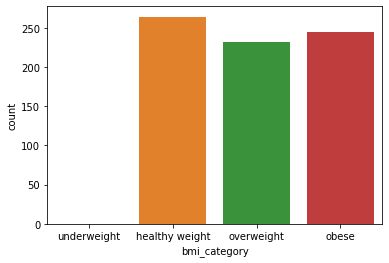

In [38]:
sns.countplot(x='bmi_category', data=preprocessed_df, 
              order=['underweight', 'healthy weight', 'overweight', 'obese'])
plt.show()

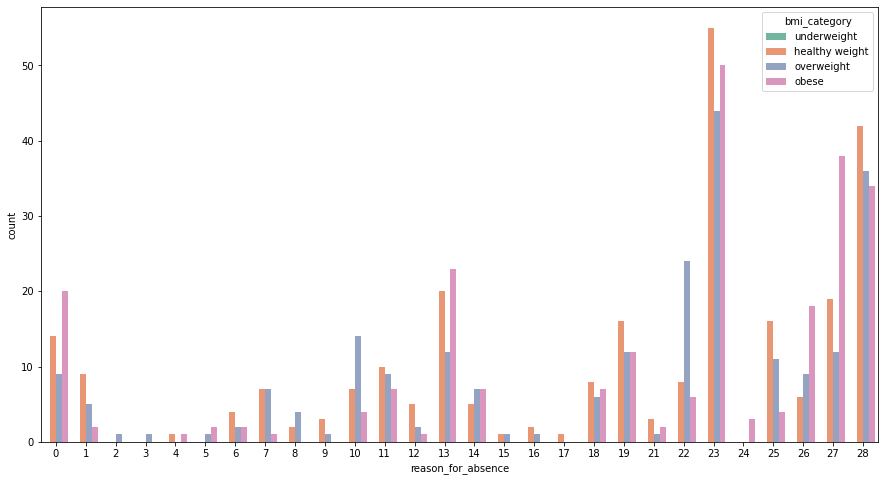

In [39]:
plt.figure(figsize=(15, 8))
sns.countplot(x='reason_for_absence', data=preprocessed_df, hue='bmi_category',
             hue_order=['underweight', 'healthy weight', 'overweight', 'obese'],
             palette='Set2')

plt.show()

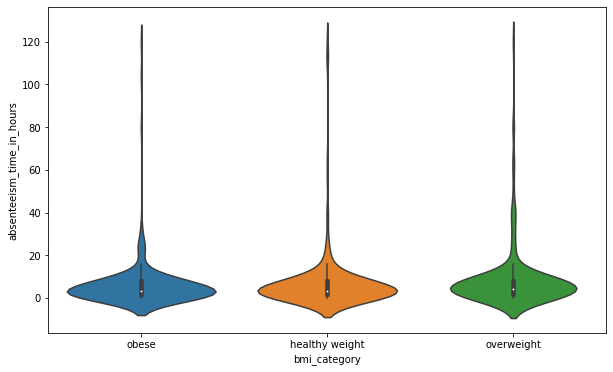

In [40]:
plt.figure(figsize=(10,6))
sns.violinplot(data=preprocessed_df, x='bmi_category', y='absenteeism_time_in_hours')
plt.show()

### Age and Education Factors

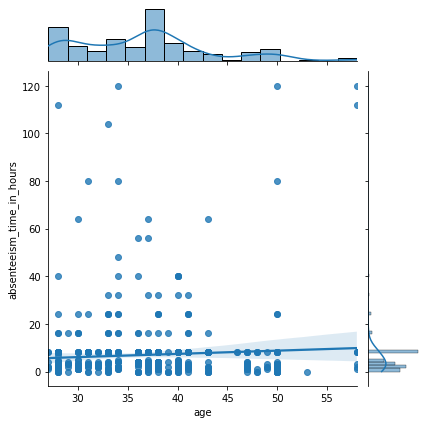

In [41]:
sns.jointplot(data=preprocessed_df, x='age', y='absenteeism_time_in_hours',
             kind='reg')
plt.show()

In [42]:
print("Correlation Age and Absent Hours", preprocessed_df.age.corr(preprocessed_df.absenteeism_time_in_hours))

Correlation Age and Absent Hours 0.06575970132037087


In [43]:
stats.pearsonr(preprocessed_df.absenteeism_time_in_hours, preprocessed_df.age)

(0.06575970132037089, 0.07381334916609684)

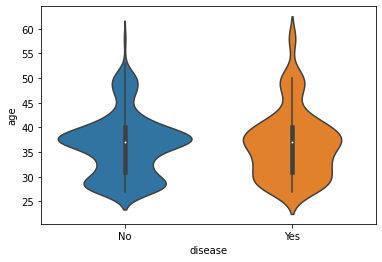

In [44]:
sns.violinplot(data=preprocessed_df, x='disease', y='age')
plt.show()

In [45]:
# hypothesis test for equality of means

age_disease = preprocessed_df.age[preprocessed_df.disease=='Yes']
age_no_disease = preprocessed_df.age[preprocessed_df.disease=='No']

test_result = stats.ttest_ind(age_disease, age_no_disease)

print('Test statistic', test_result[0])
print("p-value", test_result[1])

# distribution test

ks_result = ks_2samp(age_disease, age_no_disease)

print('KS - Test statistic', ks_result[0])
print("KS - p-value", ks_result[1])

Test statistic 0.6297608872846625
p-value 0.5290459551429652
KS - Test statistic 0.056820722475965375
KS - p-value 0.6188353608928694


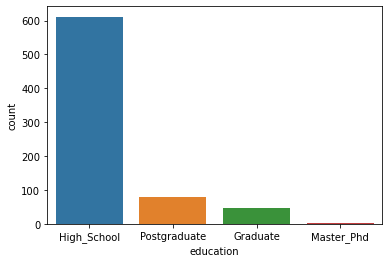

In [46]:
sns.countplot(data=preprocessed_df, x='education')
plt.show()

In [47]:
preprocessed_df.education.value_counts(normalize=True)

High_School     0.825676
Postgraduate    0.106757
Graduate        0.062162
Master_Phd      0.005405
Name: education, dtype: float64

- most of the employees in the data have a high school degree (82.6%), which means that the data is highly biased toward these employees.

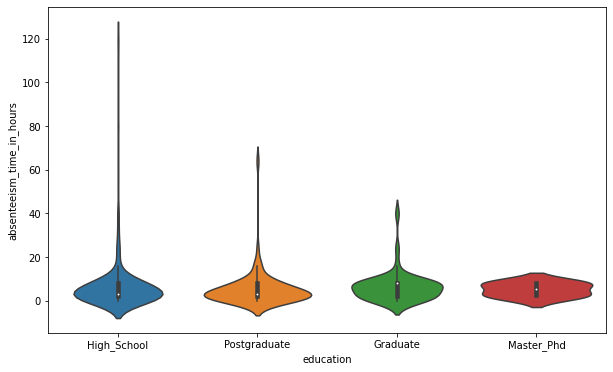

In [48]:
plt.figure(figsize=(10,6))
sns.violinplot(data=preprocessed_df, x='education', y='absenteeism_time_in_hours')
plt.show()

In [49]:
preprocessed_df.groupby('education')['absenteeism_time_in_hours'].agg(['mean', 'std'])

,mean,std
education,,
Graduate,6.391304,6.754351
High_School,7.189853,14.258617
Master_Phd,5.250000,3.201562
Postgraduate,5.265823,7.962587


- You can see that both the mean and standard deviation of the hours of absence are decreasing, meaning that highly educated employees tend to have shorter absences. Of course, a higher degree of education is not a cause for such a phenomenon and is more of an indication of it.

### Transportation Costs and Distance to Work Factors

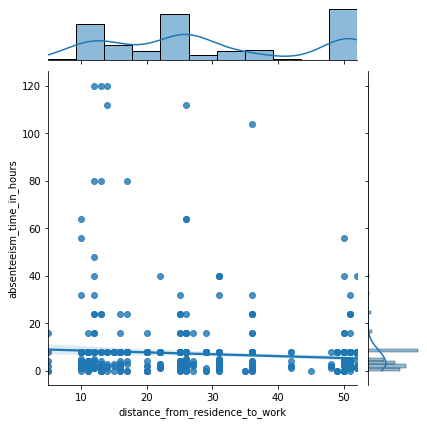

In [51]:
sns.jointplot(data=preprocessed_df, x='distance_from_residence_to_work', y='absenteeism_time_in_hours',
             kind='reg')
plt.show()

In [52]:
preprocessed_df.distance_from_residence_to_work.corr(preprocessed_df.absenteeism_time_in_hours)

-0.08836282189613705

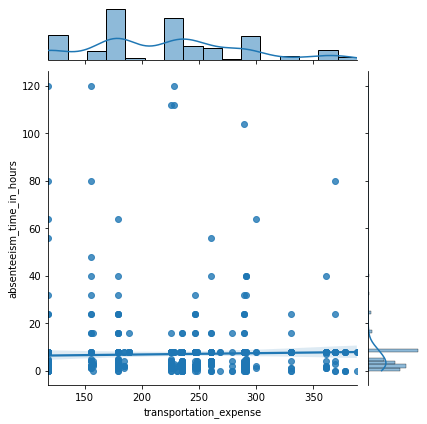

In [53]:
sns.jointplot(data=preprocessed_df, x='transportation_expense', y='absenteeism_time_in_hours',
             kind='reg')
plt.show()

In [54]:
preprocessed_df.distance_from_residence_to_work.corr(preprocessed_df.transportation_expense)

0.262183110631908

- The distributions of Distance from Residence to Work and Transportation expense look close to normal distributions, while the absenteeism time in hours is heavily right-skewed. This makes the comparison between the variables difficult to interpret. One solution to this problem is to transform the data into something close to a normal distribution.

### Box-Cox or Yeo-Johnson transformations

In [60]:
hours = stats.yeojohnson(preprocessed_df.absenteeism_time_in_hours)[0]

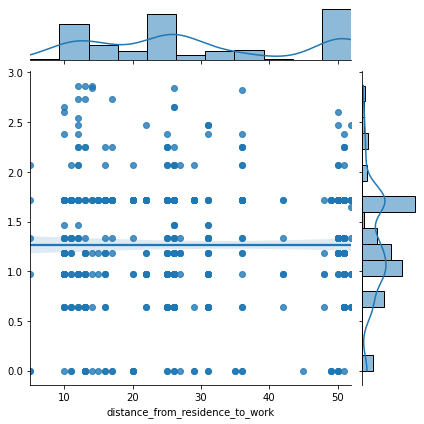

In [61]:
sns.jointplot(x=preprocessed_df.distance_from_residence_to_work, y=hours, kind='reg')
plt.show()

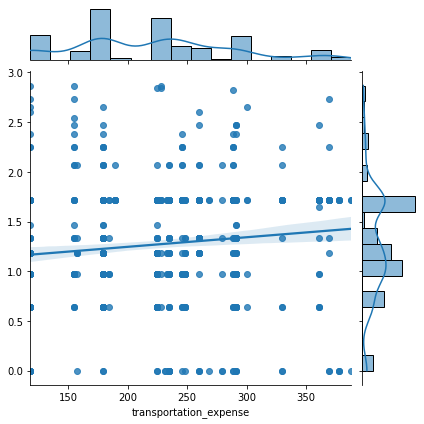

In [62]:
sns.jointplot(x=preprocessed_df.transportation_expense, y=hours, kind='reg')
plt.show()

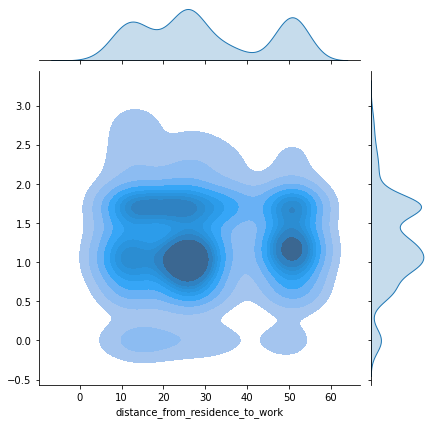

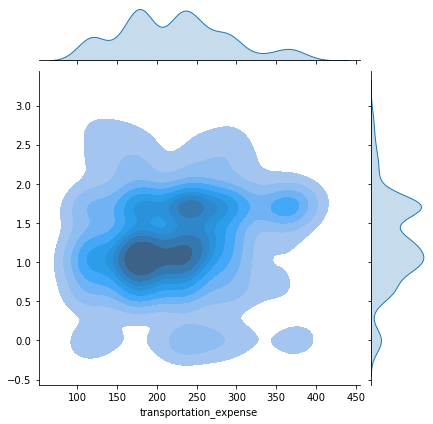

In [65]:
sns.jointplot(x=preprocessed_df.distance_from_residence_to_work, y=hours, kind='kde', fill=True)
plt.show()

sns.jointplot(x=preprocessed_df.transportation_expense, y=hours, kind='kde', fill=True)
plt.show()

In [67]:
distance_corr = stats.pearsonr(hours, preprocessed_df.distance_from_residence_to_work)
transportation_corr = stats.pearsonr(hours, preprocessed_df.transportation_expense)

print(f"Distance correlation {distance_corr[0]:.3f} and p-value: {distance_corr[1]:.3f}")
print(f"Transportation correlation {transportation_corr[0]:.3f} and p-value: {transportation_corr[1]:.3f}")

Distance correlation -0.000 and p-value: 0.999
Transportation correlation 0.113 and p-value: 0.002


- These results confirm our observation, stating that there is a slight positive correlation between Transportation expense and Absenteeism time in hours.

### Temporal Factors

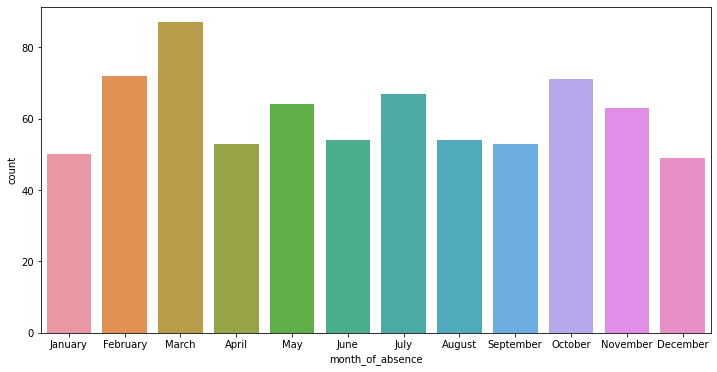

In [74]:
plt.figure(figsize=(12,6))
sns.countplot(data=preprocessed_df, x='month_of_absence', order=month_name[1:13])
plt.show()

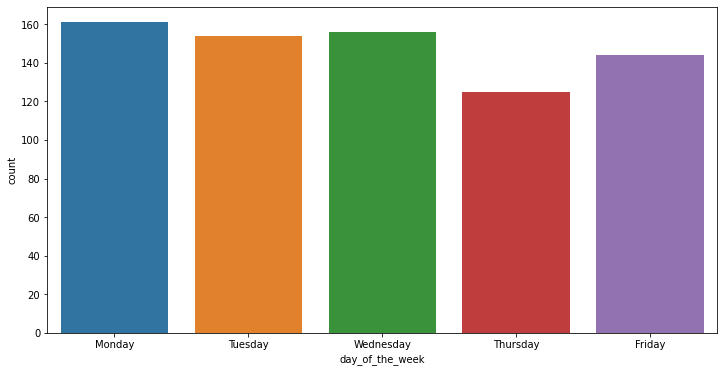

In [72]:
plt.figure(figsize=(12,6))
sns.countplot(data=preprocessed_df, x='day_of_the_week', order=day_name[:5])
plt.show()

In [68]:
preprocessed_df.head()

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours,disease,bmi_category
0,11,26,July,Tuesday,Spring,289,36,13,33,239.554,...,2,Yes,No,1,90,172,30,4,No,obese
1,36,0,July,Tuesday,Spring,118,13,18,50,239.554,...,1,Yes,No,0,98,178,31,0,No,obese
2,3,23,July,Wednesday,Spring,179,51,18,38,239.554,...,0,Yes,No,0,89,170,31,2,No,obese
3,7,7,July,Thursday,Spring,279,5,14,39,239.554,...,2,Yes,Yes,0,68,168,24,4,Yes,healthy weight
4,11,23,July,Thursday,Spring,289,36,13,33,239.554,...,2,Yes,No,1,90,172,30,2,No,obese


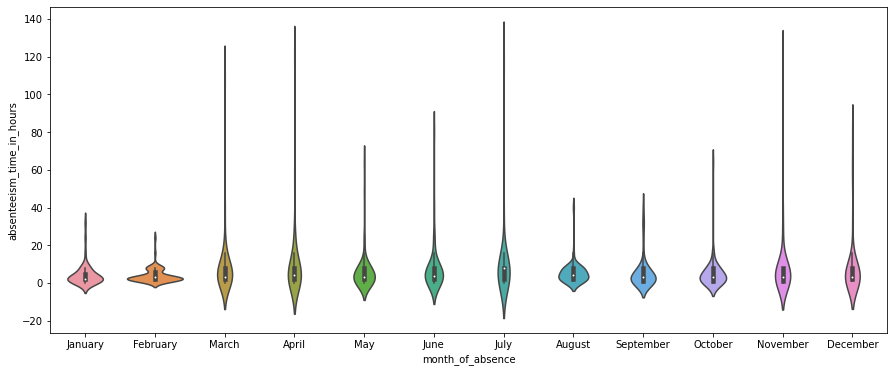

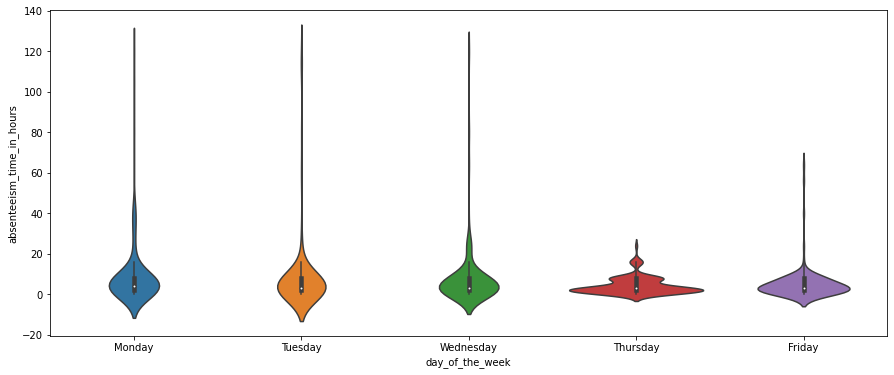

In [78]:
plt.figure(figsize=(15, 6))

sns.violinplot(data=preprocessed_df, x='month_of_absence', y='absenteeism_time_in_hours', order=month_name[1:13])
plt.show()

plt.figure(figsize=(15, 6))
sns.violinplot(data=preprocessed_df, x='day_of_the_week', y='absenteeism_time_in_hours', order=day_name[:5])
plt.show()

In [82]:
preprocessed_df.groupby('month_of_absence')['absenteeism_time_in_hours'].agg(['mean', 'std'])

,mean,std
month_of_absence,,
April,9.094340,18.023771
August,5.333333,5.749487
December,8.448980,16.049482
February,4.083333,3.710472
January,4.440000,5.785838
July,10.955224,21.546590
June,7.611111,12.358507
March,8.793103,16.893055
May,6.250000,10.314114


In [86]:
# maximum average hours in july and minimum hours in february
# Hypothesis test

july_data = preprocessed_df.absenteeism_time_in_hours[preprocessed_df.month_of_absence=='July']

no_july_data = preprocessed_df.absenteeism_time_in_hours[~(preprocessed_df.month_of_absence=='July')]

res = stats.ttest_ind(july_data, no_july_data)

print(f"Test statistic: {res[0]:.3f}\np-value: {res[1]:.3f}")

Test statistic: 2.605
p-value: 0.009


In [80]:
preprocessed_df.groupby('day_of_the_week')['absenteeism_time_in_hours'].agg(['mean', 'std'])

,mean,std
day_of_the_week,,
Friday,5.125000,7.911110
Monday,9.248447,15.972645
Thursday,4.424000,4.265889
Tuesday,7.980519,18.027383
Wednesday,7.147436,13.267863


In [87]:
# maximum average hours on monday and minimum hours on thursday
# Hypothesis test

thursday_data = preprocessed_df.absenteeism_time_in_hours[preprocessed_df.day_of_the_week=='Thursday']

no_thursday_data = preprocessed_df.absenteeism_time_in_hours[~(preprocessed_df.day_of_the_week=='Thursday')]

res1 = stats.ttest_ind(thursday_data, no_thursday_data)

print(f"Test statistic: {res1[0]:.3f}\np-value: {res1[1]:.3f}")

Test statistic: -2.307
p-value: 0.021
